# DSC 80 - Discussion 03

### Due Date: Saturday October 15, 11:59 PM

**Discussions will be due by the end of the day on Saturday**

---


In [1]:
# import libraries
import pandas as pd
import numpy as np
import os
from IPython.display import HTML

In [2]:
# for formatting purposes
def multi_table(table_list):
    ''' Acceps a list of IpyTable objects and returns a table which contains each IpyTable in a cell
    '''
    return HTML(
        '<table><tr style="background-color:white;">' + 
        ''.join(['<td>' + table._repr_html_() + '</td>' for table in table_list]) +
        '</tr></table>'
    )

In [3]:
# from discussion import *

In [4]:
import numpy as np
import pandas as pd
import os

# Review: Hypothesis Testing & Combining DataFrames

## Hypothesis Testing

We will cover examples of two key types of hypothesis testing
* Comparing two categorical distributions
* Comparing sub-group statistic to a population parameter

### Steps to follow to solve a hypothesis testing problem
1. Form the Null and Alternate hypothesis
2. Define the test statistic
3. Calculate observed/sample test statistic (form an intuition of how big/small/extreme it is)
4. Simulate one instance of test statistic under null hypothesis. Simulate the whole null distribution
5. Calculate p-value based on null distribution and observed test statistic
6. Plot the null distribution, observed statistic and validate the p-value
7. Provide conclusion as to whether you reject or fail-to-reject null hypothesis

### Are Snapchat users similar in age distribution compared to overall social media users?
Based on the (fake) survey collected from 1000 Snapchat users, we want to understand if the age distribution of these two user groups are significantly different?
- Note that the survey data below is already aggregated, which can be used directly.

In [5]:
age_df = pd.DataFrame([['GenZ', 0.64, 0.48],
                    ['Millennials', 0.24, 0.36],
                    ['GenX', 0.08, 0.10],
                    ['Boomers', 0.04, 0.06]],
                   columns=['Age Group', 'Snapchat', 'Social Media']).set_index('Age Group')

age_df

,Snapchat,Social Media
Age Group,,
GenZ,0.64,0.48
Millennials,0.24,0.36
GenX,0.08,0.10
Boomers,0.04,0.06


#### Step-1: Form the Null and Alternate Hypotheses
Null hypothesis:

Alternate hypothesis: 

#### Step-2: Define the test-statistic

A common test statistic used while comparing two categorical distributions is TVD (Total Variation Distance)

**TVD:** Sum of absolute differences between corresponding values of two distribution, divided by 2.

#### Step-3: Calculate observed/sample test statistic

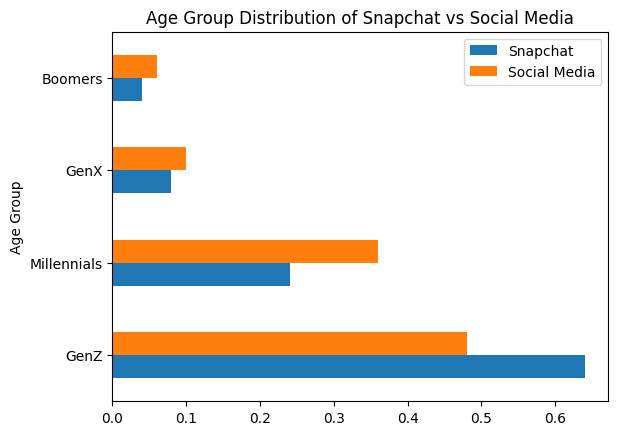

In [6]:
age_df.plot(kind='barh', title='Age Group Distribution of Snapchat vs Social Media');

In [7]:
observed_tvd = np.sum(np.abs(age_df['Snapchat'] - age_df['Social Media'])) / 2
observed_tvd

# Think - What would be the observed TVD if the two groups are exactly similar?
# Further - What does this imply about the TVD value as the difference increases/decreases?

0.16000000000000003

#### Step-4 Simulate the test-statistic under null hypothesis. And simulate the null distribution

In [8]:
# Simulate one instance - Keep null hypothesis in mind
# There is no difference between Snapchat age groups wrt. overall age groups.
# So, a sample under null hypothesis should like an 'overall social media' distribution.
np.random.multinomial(1000, age_df['Social Media']) / 1000

array([0.465, 0.367, 0.101, 0.067])

In [9]:
# Simulate N times - Larger the N, smoother will be the Null distribution
# Traditional way - Use a for loop and store the null test statistic
# Faster way - Utilize numpy functionalities
N = 5000
np.random.multinomial(1000, age_df['Social Media'], size=N) / 1000

array([[0.484, 0.362, 0.088, 0.066],
       [0.475, 0.339, 0.113, 0.073],
       [0.48 , 0.358, 0.098, 0.064],
       ...,
       [0.495, 0.345, 0.09 , 0.07 ],
       [0.499, 0.335, 0.107, 0.059],
       [0.484, 0.363, 0.09 , 0.063]])

In [10]:
null_dists = np.random.multinomial(1000, age_df['Social Media'], size=N) / 1000

# Power of broadcasting: Can take difference between 2D array and 1D array 
# by broadcasting 1D array to 2D array
null_tvds = np.sum(np.abs(null_dists - age_df['Social Media'].to_numpy()), axis=1) / 2
null_tvds

array([0.025, 0.024, 0.033, ..., 0.022, 0.019, 0.038])

#### Step-5: Calculate p-value

In [11]:
p_val = np.mean(null_tvds >= observed_tvd)
p_val

0.0

#### Step-6: Visualize and validate the p-value

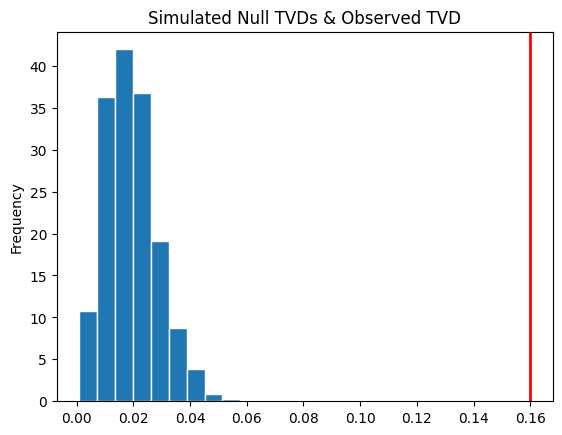

In [12]:
import matplotlib.pyplot as plt
pd.Series(null_tvds).plot(kind='hist', 
                     density=True,
                     ec='w',
                     title='Simulated Null TVDs & Observed TVD');
plt.axvline(x=observed_tvd, color='red', linewidth=2);

In [13]:
# Recall Null Hypothesis - 

#  Think - What happens to your belief about the null hypothesis if we assume the distribution is taken 
#  from only 10 or 100 users?
#  Would you believe the null hypothesis more or believe it less??

#### Step-7: Provide conclusion

Conclusion: 

**Question 1**

A study from a competitive programming test shows a lower average score for students who used 'Go' programming language compared to others. Test whether this lower avg. score of 'Go' programming language is due to chance alone.

- The function should take a DataFrame like `prog_df`, number of null test statistic simulations `N`, 
- It should return a list containing a) observed test statistic, b) and the p-value of the hypothesis test. Note that the function should work for any `prog_df` having same column names, and the same unique values in `language` column.

Hint: Don't forget to utilize `numpy` functionality to eliminate the `for` loop. Check lecture 06 final example for a very similar problem and implementation.

In [14]:
def hyp_test_lower_avg(df, N):
    """
    Tests whether the lower avg. of 'Go' is due to chance alone.
    
    - The function should take a DataFrame like prog_df, number of null test statistic simulations N,
    - It should return a list containing a) observed test statistic, b) and the p-value of the hypothesis test

    :Example:
    >>> prog_df = pd.read_csv(os.path.join('data','prog_df.csv'))
    >>> q1_out = hyp_test_lower_avg(prog_df, 1000)
    >>> isinstance(q1_out, list)
    True
    >>> np.isclose(q1_out[0], 76.96903195339905, atol=0.01)
    True
    >>> 0.08 <= q1_out[1] <= 0.20
    True
    """
    # BEGIN SOLUTION
    grouped_df = df.groupby('language')['score'].agg(['mean', 'count'])
    n_go = grouped_df.loc['Go', 'count']
    observed_go_avg = grouped_df.loc['Go', 'mean']
    
    null_go_avgs = np.random.choice(df['score'], size=(N, n_go)).mean(axis=1)
    
    p_val = np.mean(null_go_avgs <= observed_go_avg)
    
    return [observed_go_avg, p_val]
    # END SOLUTION

In [15]:
prog_df = pd.read_csv(os.path.join('data','prog_df.csv'))
grouped_df = prog_df.groupby('language')['score'].agg(['mean', 'count'])
grouped_df

,mean,count
language,,
C++,78.871342,139
Go,76.969032,50
Java,77.581125,95
Python,79.507595,216


In [16]:
# What's the test statistic?
# What's the observed test statistic?
# How to simulate the null hypothesis?
# p-value?

In [17]:
# don't change this cell -- it is needed for the tests to work

prog_df = pd.read_csv(os.path.join('data','prog_df.csv'))
q1_out = hyp_test_lower_avg(prog_df, 1000)

In [18]:
""" # BEGIN TEST CONFIG
points: 1
failure_message: 'doctest: type'
""" # END TEST CONFIG
isinstance(q1_out, list)

True

In [19]:
""" # BEGIN TEST CONFIG
points: 1
failure_message: 'doctest: observed test statistic'
""" # END TEST CONFIG
np.isclose(q1_out[0], 76.96903195339905, atol=0.01)

True

In [20]:
""" # BEGIN TEST CONFIG
points: 3
failure_message: 'doctest: p-value'
""" # END TEST CONFIG
0.08 <= q1_out[1] <= 0.20

True

## Combining DataFrames 

* [`concat()`](https://pandas.pydata.org/docs/reference/api/pandas.concat.html)
* [`merge()`](https://pandas.pydata.org/docs/reference/api/pandas.DataFrame.merge.html)
* [`join()`](https://pandas.pydata.org/docs/reference/api/pandas.DataFrame.join.html)

### `concat()`

* Used to append one (or more) dataframes one below the other (or sideways, depending on whether the axis option is set to 0 or 1).
    * Useful if we have two or more data sets containing the same columns but different rows of data.
    * We can also concat the columns from one `Dataframe` to those of another `Dataframe`.

In [21]:
# left dataframe
left = pd.DataFrame({
   'id':[1,2,3,4,5],
   'Name': ['Aaron', 'Marina', 'Justin', 'Janine', 'Ilya'],
   'subject_id':['sub1','sub2','sub4','sub6','sub5']})

# right dataframe
right = pd.DataFrame(
   {'id':[1,2,3,4,5],
   'Name': ['Enrique', 'Parker', 'Erik', 'Allston', 'Betty'],
   'subject_id':['sub2','sub4','sub3','sub6','sub5']})

multi_table([left, right])

,id,Name,subject_id
0,1,Aaron,sub1
1,2,Marina,sub2
2,3,Justin,sub4
3,4,Janine,sub6
4,5,Ilya,sub5
,id,Name,subject_id
0,1,Enrique,sub2
1,2,Parker,sub4
2,3,Erik,sub3
3,4,Allston,sub6


In [22]:
# add 'left' below 'right'
pd.concat([right, left])

,id,Name,subject_id
0,1,Enrique,sub2
1,2,Parker,sub4
2,3,Erik,sub3
3,4,Allston,sub6
4,5,Betty,sub5
0,1,Aaron,sub1
1,2,Marina,sub2
2,3,Justin,sub4
3,4,Janine,sub6
4,5,Ilya,sub5


In [23]:
# if you want to keep track of the names dataframes after concat, use 'keys'
pd.concat([right, left], keys=['right', 'left'])

id     Name subject_id
right 0   1  Enrique       sub2
      1   2   Parker       sub4
      2   3     Erik       sub3
      3   4  Allston       sub6
      4   5    Betty       sub5
left  0   1    Aaron       sub1
      1   2   Marina       sub2
      2   3   Justin       sub4
      3   4   Janine       sub6
      4   5     Ilya       sub5

In [24]:
# add 'left' to the side of 'right'
pd.concat([right, left], axis=1)

,id,Name,subject_id,id,Name,subject_id
0,1,Enrique,sub2,1,Aaron,sub1
1,2,Parker,sub4,2,Marina,sub2
2,3,Erik,sub3,3,Justin,sub4
3,4,Allston,sub6,4,Janine,sub6
4,5,Betty,sub5,5,Ilya,sub5


### `merge()`

* Used to combine two (or more) dataframes on the basis of **values of common columns** (indices can also be used, use `left_index=True` and/or `right_index=True`).
    * If we are joining columns on columns, the DataFrame indexes will be ignored. 
    * If we are joining indexes on indexes or indexes on a column or columns, the index will be passed on.

* **`on`**: column or index names to join on. 
    * These must be found in both DataFrames. 
    * If `on` is `None` and not merging on indexes, then this defaults to the intersection of the columns in both DataFrames.

In [25]:
multi_table([left, right])

,id,Name,subject_id
0,1,Aaron,sub1
1,2,Marina,sub2
2,3,Justin,sub4
3,4,Janine,sub6
4,5,Ilya,sub5
,id,Name,subject_id
0,1,Enrique,sub2
1,2,Parker,sub4
2,3,Erik,sub3
3,4,Allston,sub6


In [26]:
# merge left and right tables on 'id' column
on_id = pd.merge(left,right,on='id')

# how many rows, how many columns?
multi_table([left, right, on_id])

,id,Name,subject_id
0,1,Aaron,sub1
1,2,Marina,sub2
2,3,Justin,sub4
3,4,Janine,sub6
4,5,Ilya,sub5
,id,Name,subject_id
0,1,Enrique,sub2
1,2,Parker,sub4
2,3,Erik,sub3
3,4,Allston,sub6


In [27]:
# merge left and right tables on 'id' and 'subject_id' columns
on_id_subject = pd.merge(left,right,on=['id', 'subject_id'])

# how many rows, how many columns, what are the indices?
multi_table([left, right, on_id_subject])

,id,Name,subject_id
0,1,Aaron,sub1
1,2,Marina,sub2
2,3,Justin,sub4
3,4,Janine,sub6
4,5,Ilya,sub5
,id,Name,subject_id
0,1,Enrique,sub2
1,2,Parker,sub4
2,3,Erik,sub3
3,4,Allston,sub6


* **`how`**: specifies how to determine which keys are to be included in the resulting table. 
    * If a key (column name) combination does not appear in either the left or the right tables, the values in the joined table will be `np.NaN`.
    * Defaults to `inner`

In [28]:
data_a = {
        'subject_id': ['1', '2', '3', '4', '5'],
        'first_name': ['Manny', 'Will', 'Hunter', 'Ian', 'Eric'], 
        'last_name': ['Machado', 'Myers', 'Renfroe', 'Kinsler', 'Hosmer']}
df_a = pd.DataFrame(data_a, columns = ['subject_id', 'first_name', 'last_name'])

data_b = {
        'subject_id': ['4', '5', '6', '7', '8'],
        'first_name': ['Cody', 'Justin', 'Corey', 'Clayton', 'Kenley'], 
        'last_name': ['Bellinger', 'Turner', 'Seager', 'Kershaw', 'Jansen']}
df_b = pd.DataFrame(data_b, columns = ['subject_id', 'first_name', 'last_name'])

multi_table([df_a, df_b])

,subject_id,first_name,last_name
0,1,Manny,Machado
1,2,Will,Myers
2,3,Hunter,Renfroe
3,4,Ian,Kinsler
4,5,Eric,Hosmer
,subject_id,first_name,last_name
0,4,Cody,Bellinger
1,5,Justin,Turner
2,6,Corey,Seager
3,7,Clayton,Kershaw


| Merge Method  | Description                  |
| :-------      | :---------------------------:| 
| `left`        | Use keys from left object    | 
| `right`       | Use keys from right object   | 
| `outer`       | Use union of keys            |
| `inner`       | Use intersection of keys     | 

In [29]:
# based on the output below, what 'how' argument was passed into pd.merge?
how_list = ['outer', 'inner', 'right', 'left']

merge_method = np.random.choice(how_list)

pd.merge(df_a, df_b, on='subject_id', how=merge_method)

,subject_id,first_name_x,last_name_x,first_name_y,last_name_y
0,4,Ian,Kinsler,Cody,Bellinger
1,5,Eric,Hosmer,Justin,Turner


In [30]:
# let's check!
merge_method

'inner'

### `join()`

* Used to merge two dataframes on the basis of the index; instead of using `merge()` with the option `left_index=True`, we can use `join()`.
    * Join operation honors the object on which it is called: `a.join(b)` $ \neq $ `b.join(a)`.

Facts about `merge()` vs `join()`:

* `merge()` is the underlying function used for all merge/join behavior
* `join()` is basically a specific behavior of `merge()` (left join using indices)
* For all practical purposes, `merge()` is usually used. While speaking, in general, merging and joining mean the same thing - combining DataFrames/tables based on common columns or indices.

<img src="imgs/join_types.jpg">

1. **Inner Join** – only keep rows where the merge “on” value exists in both the left and right dataframes.
2. **Left Outer** – keep every row in the left dataframe.
    * Where there are missing values of the “on” variable in the right dataframe, add `np.NaN` values in the result.
3. **Right Join** – keep every row in the right dataframe. 
    * Where there are missing values of the “on” variable in the left column, add `np.NaN` values in the result.
4. **Outer Join** – returns all the rows from the left dataframe, all the rows from the right dataframe, and matches up rows where possible, with `NaNs` elsewhere.

We'll start with a simple example:

In [31]:
df1 = pd.DataFrame({'key': ['foo', 'bar'], 'val': [1, 2]}).set_index('key')
df2 = pd.DataFrame({'key': ['foo', 'bar'], 'val': [4, 5]}).set_index('key')

joined = df1.join(df2, lsuffix='_l', rsuffix='_r')

multi_table([df1, df2, joined])

Now let's try something a bit more complex:

In [32]:
df1_data = {
    'Year' : [2014, 2014, 2014, 2014, 2014],
    'Week' : ['A', 'B', 'B', 'C', 'D'],
    'Color' : ['Red', 'Red', 'Black', 'Red', 'Green'],
    'Val' : [50, 60, 70, 10, 20]
}

df1 = pd.DataFrame(df1_data).set_index('Week')

df2_data = {
    'Year' : [2014, 2014, 2014, 2014, 2014],
    'Week' : ['A', 'B', 'C', 'C', 'D'],
    'Color' : ['Black', 'Black', 'Green', 'Red', 'Red'],
    'Score' : [30, 100, 50, 20, 40]
}

df2 = pd.DataFrame(df2_data).set_index('Week')

multi_table([df1, df2])

,Year,Color,Val
Week,,,
A,2014,Red,50
B,2014,Red,60
B,2014,Black,70
C,2014,Red,10
D,2014,Green,20
,Year,Color,Score
Week,,,
A,2014,Black,30
B,2014,Black,100


In [33]:
# how many rows, how many columns?
df1.join(df2, lsuffix='_l', rsuffix = '_r')

,Year_l,Color_l,Val,Year_r,Color_r,Score
Week,,,,,,
A,2014,Red,50,2014,Black,30
B,2014,Red,60,2014,Black,100
B,2014,Black,70,2014,Black,100
C,2014,Red,10,2014,Green,50
C,2014,Red,10,2014,Red,20
D,2014,Green,20,2014,Red,40


In [34]:
# will this be any different?
df2.join(df1, lsuffix='_l', rsuffix = '_r')

,Year_l,Color_l,Score,Year_r,Color_r,Val
Week,,,,,,
A,2014,Black,30,2014,Red,50
B,2014,Black,100,2014,Red,60
B,2014,Black,100,2014,Black,70
C,2014,Green,50,2014,Red,10
C,2014,Red,20,2014,Red,10
D,2014,Red,40,2014,Green,20


### Data Science Interview Question
How many rows will you get if you perform:
- a) `df1` **left join** `df2` on `'letter'` ?
- b) `df1` **inner join** `df2` on `'letter'` ?
- c) `df1` **right join** `df2` on `'letter'` ?

Answer the question without using python code.
Can you write how the final merged/joined table will look like?

In [35]:
df1 = pd.DataFrame({
    'letter' : [1, 1, 2, 3, 4, 4],
    'alphabet' : ['A', 'B', 'C', 'D', 'E', 'F']
})

df2 = pd.DataFrame({
    'letter' : [1, 2, 4, 4, 4],
    'alphabet' : ['G', 'H', 'I', 'J', 'K']
})

multi_table([df1, df2])

,letter,alphabet
0,1,A
1,1,B
2,2,C
3,3,D
4,4,E
5,4,F
,letter,alphabet
0,1,G
1,2,H
2,4,I


**Question 2**

You are given two seperate dataframes: `mlb_2017` and `mlb_2018`. Both dataframes contain statistics for the 2017 and 2018 baseball seasons respectively. Your job is two combine these two dataframes into one using the following guidelines:

* The dataframe you return should be indexed by team name (`Tm`).
* The dataframe you return should include all columns from both `mlb_2017` and `mlb_2018`.
* Use the suffixes `_2017` and `_2018` to differentiate between statistics from both seasons.

Create a function `combined_seasons` that returns, as a tuple, the following:

* The combined dataframe described above.
* The team with most homeruns (`HR`) bewteen the 2017 and 2018 seasons combined.

In [36]:
def combined_seasons(df1, df2):
    """
    Create a function that return, as a tuple, a dataframe combining
    the 2017 and 2018 MLB seasons as well as the team that hit the most
    homeruns between the two seasons.

    :Example:
    >>> mlb_2017 = pd.read_csv(os.path.join('data','mlb_2017.txt'))
    >>> mlb_2018 = pd.read_csv(os.path.join('data','mlb_2018.txt'))
    >>> q2_out = combined_seasons(mlb_2017, mlb_2018)
    >>> q2_out[0].shape == (30, 56)
    True
    >>> q2_out[1] in q2_out[0].index
    True
    >>> all([(('_2017' in x) or ('_2018' in x)) for x in q2_out[0]])
    True
    >>> q2_out[1] == 'NYY'
    True
    """
    # BEGIN SOLUTION
    df_combined = pd.merge(df1, df2, on='Tm', suffixes=('_2017', '_2018')).set_index('Tm')
    
    hr_max = df_combined.filter(regex='HR').sum(axis=1).idxmax()
    
    return (df_combined, hr_max)
    # END SOLUTION

In [37]:
# read in the following .txt files
mlb_2017 = pd.read_csv(os.path.join('data','mlb_2017.txt'))
mlb_2018 = pd.read_csv(os.path.join('data','mlb_2018.txt'))

multi_table([mlb_2017.head(), mlb_2018.head()])

,Tm,#Bat,BatAge,R/G,G,PA,AB,R,H,2B,...,SLG,OPS,OPS+,TB,GDP,HBP,SH,SF,IBB,LOB
0,ARI,45,28.3,5.01,162,6224,5525,812,1405,314,...,0.445,0.774,94,2457,106,54,39,27,44,1118
1,ATL,49,28.7,4.52,162,6216,5584,732,1467,289,...,0.412,0.738,92,2303,137,66,59,32,57,1127
2,BAL,50,28.6,4.59,162,6140,5650,743,1469,269,...,0.435,0.747,100,2458,138,50,10,37,12,1041
3,BOS,49,27.3,4.85,162,6338,5669,785,1461,302,...,0.407,0.736,92,2305,141,53,9,36,48,1134
4,CHC,47,27.1,5.07,162,6283,5496,822,1402,274,...,0.437,0.775,99,2403,134,82,48,32,54,1147
,Tm,#Bat,BatAge,R/G,G,PA,AB,R,H,2B,...,SLG,OPS,OPS+,TB,GDP,HBP,SH,SF,IBB,LOB
0,ARI,49,29.2,4.28,162,6157,5460,693,1283,259,...,0.397,0.707,85,2170,110,52,38,45,36,1086
1,ATL,58,27.3,4.69,162,6251,5582,759,1433,314,...,0.417,0.742,99,2330,99,66,49,43,53,1143
2,BAL,56,28.4,3.84,162,6034,5507,622,1317,242,...,0.391,0.689,90,2153,132,57,13,35,19,1027
3,BOS,44,27.7,5.41,162,6302,5623,876,1509,355,...,0.453,0.792,112,2550,130,55,7,48,38,1124


In [38]:
# don't change this cell -- it is needed for the tests to work
mlb_2017 = pd.read_csv(os.path.join('data','mlb_2017.txt'))
mlb_2018 = pd.read_csv(os.path.join('data','mlb_2018.txt'))
q2_out = combined_seasons(mlb_2017, mlb_2018)

In [39]:
""" # BEGIN TEST CONFIG
points: 1
failure_message: 'doctest: shape'
""" # END TEST CONFIG
q2_out[0].shape == (30, 56)

True

In [40]:
""" # BEGIN TEST CONFIG
points: 1
failure_message: 'doctest: index'
""" # END TEST CONFIG
q2_out[1] in q2_out[0].index

True

In [41]:
""" # BEGIN TEST CONFIG
points: 2
failure_message: 'doctest: columns'
""" # END TEST CONFIG
all([(('_2017' in x) or ('_2018' in x)) for x in q2_out[0]])

True

In [42]:
""" # BEGIN TEST CONFIG
points: 1
failure_message: 'doctest: most homruns incorrect'
""" # END TEST CONFIG
q2_out[1] == 'NYY'

True

**Question 3**

Using the same two dataframes, `mlb_2017` and `mlb_2018`, create a function `seasonal_average` that combines them and takes the mean of each column for each team. 

* The dataframe you return should be indexed by team name (`Tm`).
* Each column should contain the average value between the *2017* and *2018* seasons for the given statistic for each team.
    * For example, the `HR` column should contain the average value for `HR` for each team between the *2017* and *2018* seasons.

In [43]:
def seasonal_average(df1, df2):
    """
    Combines df1 and df2 and take the mean of each column 
    for each team.
    
    - The dataframe you return should be indexed by team name (Tm).
    - Each column should contain the average value between the 2017 
    and 2018 seasons for the given statistic for each team.

    :Example:
    >>> mlb_2017 = pd.read_csv(os.path.join('data','mlb_2017.txt'))
    >>> mlb_2018 = pd.read_csv(os.path.join('data','mlb_2018.txt'))
    >>> q3_out = seasonal_average(mlb_2017, mlb_2018)
    >>> q3_out.shape == (30, 28)
    True
    >>> q3_out.index.nunique() == 30
    True
    >>> q3_out.loc['MIN']['HR'] == 186
    True
    >>> q3_out.loc['OAK'].max() == 6190.5
    True
    """
    # BEGIN SOLUTION
    df_combined = pd.concat((df1, df2)).set_index('Tm')
    
    averages = df_combined.groupby(df_combined.index).mean()
    
    return averages
    # END SOLUTION

In [44]:
# don't change this cell -- it is needed for the tests to work
mlb_2017 = pd.read_csv(os.path.join('data','mlb_2017.txt'))
mlb_2018 = pd.read_csv(os.path.join('data','mlb_2018.txt'))
q3_out = seasonal_average(mlb_2017, mlb_2018)

In [45]:
""" # BEGIN TEST CONFIG
points: 1
failure_message: 'doctest: shape'
""" # END TEST CONFIG
q3_out.shape == (30, 28)

True

In [46]:
""" # BEGIN TEST CONFIG
points: 1
failure_message: 'doctest: index'
""" # END TEST CONFIG
q3_out.index.nunique() == 30

True

In [47]:
""" # BEGIN TEST CONFIG
points: 1
failure_message: 'doctest: MIN HR'
""" # END TEST CONFIG
q3_out.loc['MIN']['HR'] == 186

True

In [48]:
""" # BEGIN TEST CONFIG
points: 2
failure_message: 'doctest: OAK row'
""" # END TEST CONFIG
q3_out.loc['OAK'].max() == 6190.5

True

## Congratulations! You're done!

* Submit your `.py` file to Gradescope. Note that you only need to submit the `.py` file; this notebook should not be uploaded. Make sure that all of your work is in the `.py` file by running the doctests: `python -m doctest discussion.py`.

In [49]:
# !python -m doctest discussion.py